# Lecture 1 - Programming Assignment

## Data Set


In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('oasis_dataset.csv')

# Print the dataframe
print(df)

     entry_number subject_id  visit  time_of_ad m_f  educ  ses  age  mr_delay  \
0               1  OAS2_0002      1         NaN   M    12   -1   75         0   
1               2  OAS2_0002      2         NaN   M    12   -1   76       560   
2               3  OAS2_0002      3         NaN   M    12   -1   80      1895   
3               4  OAS2_0007      1         3.0   M    16   -1   71         0   
4               5  OAS2_0007      3         3.0   M    16   -1   73       518   
..            ...        ...    ...         ...  ..   ...  ...  ...       ...   
110           111  OAS2_0184      1         2.0   F    16    3   72         0   
111           112  OAS2_0184      2         2.0   F    16    3   73       553   
112           113  OAS2_0185      1         NaN   M    16    1   80         0   
113           114  OAS2_0185      2         NaN   M    16    1   82       842   
114           115  OAS2_0185      3         NaN   M    16    1   86      2297   

     e_tiv  n_wbv    asf  


In [2]:
import warnings

warnings.filterwarnings('ignore')

## Data Set Summary

The <strong>OASIS dataset</strong>, widely used in neuroimaging and medical research, comprises brain imaging data and associated clinical variables. A core aspect of analyzing such datasets involves mitigating confounding variables to ensure robust and reliable conclusions. <strong>Balanced Risk Set Matching (BRSM)</strong> is a statistical technique designed to enhance comparability between groups in observational studies, particularly when studying treatments or conditions that evolve over time. This essay presents a summary of the OASIS dataset, emphasizing how the <strong>Balanced Risk Set Matching</strong> approach aids in addressing biases in observational studies.

In [3]:
import pandas as pd

df = pd.read_csv('oasis_dataset.csv', delimiter=',')

df.rename(columns={
    "entry_number": "Entry Number",
    "subject_id": "Subject ID",
    "visit": "Visit Number",
    "time_of_ad": "Time of AD Diagnosis",
    "m_f": "Gender",
    "educ": "Education (Years)",
    "ses": "Socioeconomic Status",
    "age": "Age",
    "mr_delay": "MRI Delay (Days)",
    "e_tiv": "Estimated Total Intracranial Volume",
    "n_wbv": "Normalized Whole Brain Volume",
    "asf": "Atlas Scaling Factor"
}, inplace=True)

# Define a mapping for better readability
covariate_labels = {
    "educ": "Education (Years)",
    "ses": "Socioeconomic Status",
    "age": "Age",
    "e_tiv": "Estimated Total Intracranial Volume",
    "n_wbv": "Normalized Whole Brain Volume",
    "asf": "Atlas Scaling Factor"
}

df.head()


,Entry Number,Subject ID,Visit Number,Time of AD Diagnosis,Gender,Education (Years),Socioeconomic Status,Age,MRI Delay (Days),Estimated Total Intracranial Volume,Normalized Whole Brain Volume,Atlas Scaling Factor
0,1,OAS2_0002,1,NaN,M,12,-1,75,0,1678,0.736,1.046
1,2,OAS2_0002,2,NaN,M,12,-1,76,560,1738,0.713,1.010
2,3,OAS2_0002,3,NaN,M,12,-1,80,1895,1698,0.701,1.034
3,4,OAS2_0007,1,3.0,M,16,-1,71,0,1357,0.748,1.293
4,5,OAS2_0007,3,3.0,M,16,-1,73,518,1365,0.727,1.286


## Data Preprocessing

    The OASIS dataset is read and processed by removing the first column from the set as it is just the entry number, then all missing values are dropped. NaN is not a null value but it is the one used to determine if the patient is control (NaN) and treated (has value). Then it is sorted by subject ID then visit. It is then grouped by subject id to avoid duplicates of the same patient.

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis

# Load the dataset
df = pd.read_csv("oasis_dataset.csv")

# Drop the first unnamed column
df = df.drop(columns=df.columns[0])

# Handle missing values (if any)
df = df.dropna()

# Display the first few rows
df = df.sort_values(by=["subject_id", "visit"]).groupby("subject_id").first().reset_index()

covariates = ['educ', 'ses', 'age', 'e_tiv', 'n_wbv', 'asf']

# Identify treated and control groups
treated_ids = df[df['time_of_ad'].notna()]['subject_id'].unique().tolist()
control_ids = df[df['time_of_ad'].isna()]['subject_id'].unique().tolist()

print(df)

   subject_id  visit  time_of_ad m_f  educ  ses  age  mr_delay  e_tiv  n_wbv  \
0   OAS2_0007      1         3.0   M    16   -1   71         0   1357  0.748   
1   OAS2_0014      1         2.0   M    16    3   76         0   1602  0.697   
2   OAS2_0028      1         2.0   M    18    2   64         0   1547  0.737   
3   OAS2_0046      1         2.0   F    15    2   83         0   1476  0.750   
4   OAS2_0050      1         2.0   M    12    4   71         0   1461  0.724   
5   OAS2_0079      1         2.0   F    12    4   69         0   1447  0.759   
6   OAS2_0089      1         3.0   M    12    2   70         0   1432  0.692   
7   OAS2_0104      1         2.0   M    16    1   70         0   1568  0.696   
8   OAS2_0114      1         2.0   F    12   -1   76         0   1316  0.727   
9   OAS2_0150      1         2.0   F    12    3   73         0   1343  0.720   
10  OAS2_0160      1         2.0   M    12   -1   76         0   1557  0.705   
11  OAS2_0181      1         2.0   F    

## Matching Based on Covariates

    In this analysis, we match patients from a treated group with those from a control group based on several covariates to reduce potential biases.

### Covariates Used for Matching

The covariates considered for matching include:
- Education (Years)
- Socioeconomic Status
- Age
- Estimated Total Intracranial Volume
- Normalized Whole Brain Volume
- Atlas Scaling Factor

### Mahalanobis Distance

    We use the Mahalanobis distance to quantify the similarity between patients. This metric accounts for the correlations between covariates and provides a measure of distance in a multivariate space, making it ideal for this context.


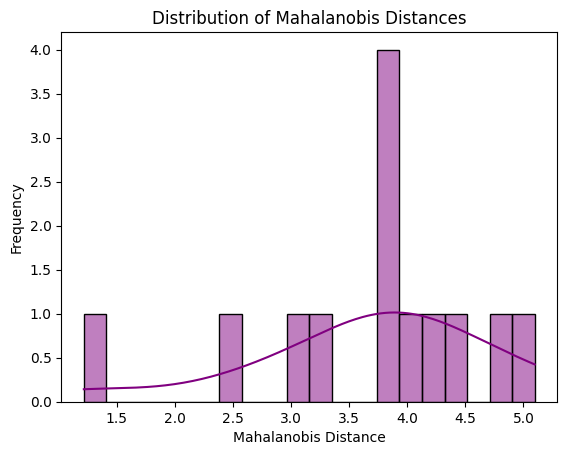

In [20]:
import numpy as np
from scipy.spatial.distance import mahalanobis
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Mahalanobis distance
def calculate_mahalanobis_distance(df, treated_id, control_id, covariates):
    # Extract the rows for the treated and control subjects
    treated = df[df['subject_id'] == treated_id][covariates].values.flatten()
    control = df[df['subject_id'] == control_id][covariates].values.flatten()
    
    # Check if the covariates are available for both subjects
    if len(treated) == 0 or len(control) == 0:
        raise ValueError(f"Covariates are missing for subject {treated_id} or {control_id}.")
    
    # Calculate the covariance matrix and its inverse
    cov_matrix = np.cov(df[covariates].T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    # Calculate the Mahalanobis distance
    return mahalanobis(treated, control, inv_cov_matrix)

distances = []
for t_id, c_id in zip(treated_ids, control_ids):
    dist = calculate_mahalanobis_distance(df, t_id, c_id, covariates)
    distances.append({"Treated_ID": t_id, "Control_ID": c_id, "Mahalanobis_Distance": dist})

# Convert to DataFrame
distance_df = pd.DataFrame(distances)

# Plot histogram
sns.histplot(distance_df["Mahalanobis_Distance"], bins=20, kde=True, color="purple")
plt.title("Distribution of Mahalanobis Distances")
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Frequency")
plt.show()

### Optimal Balanced Matching

In this section, we perform optimal balanced matching to pair treated subjects with control subjects based on several covariates. The goal is to reduce potential biases and ensure comparability between the treated and control groups.

#### Key Variables:
- **Treated IDs**: List of subject IDs for the treated group, identified by non-missing `time_of_ad` values.
- **Control IDs**: List of subject IDs for the control group, identified by missing `time_of_ad` values.
- **Covariates**: List of covariates used for matching, including `Education (Years)`, `Socioeconomic Status`, `Age`, `Estimated Total Intracranial Volume`, `Normalized Whole Brain Volume`, and `Atlas Scaling Factor`.

#### Process:
1. **Graph Construction**: A directed graph is constructed using NetworkX, with nodes representing treated and control subjects. Source and sink nodes are added to facilitate the flow network.
2. **Edge Creation**: Edges are created between the source node and treated nodes, and between control nodes and the sink node. Additionally, edges are created between treated and control nodes, weighted by the Mahalanobis distance calculated based on the covariates.
3. **Minimum Cost Flow**: The minimum cost flow algorithm is applied to find the optimal matching between treated and control subjects, minimizing the total Mahalanobis distance.
4. **Matched Pairs**: The resulting matched pairs are extracted and printed.

#### Code:

Matched Pairs after Integer Programming Matching:
('OAS2_0007', 'OAS2_0139')
('OAS2_0014', 'OAS2_0102')
('OAS2_0028', 'OAS2_0124')
('OAS2_0046', 'OAS2_0108')
('OAS2_0050', 'OAS2_0113')
('OAS2_0079', 'OAS2_0098')
('OAS2_0089', 'OAS2_0111')
('OAS2_0104', 'OAS2_0080')
('OAS2_0114', 'OAS2_0063')
('OAS2_0150', 'OAS2_0112')
('OAS2_0160', 'OAS2_0182')
('OAS2_0181', 'OAS2_0159')
('OAS2_0184', 'OAS2_0140')


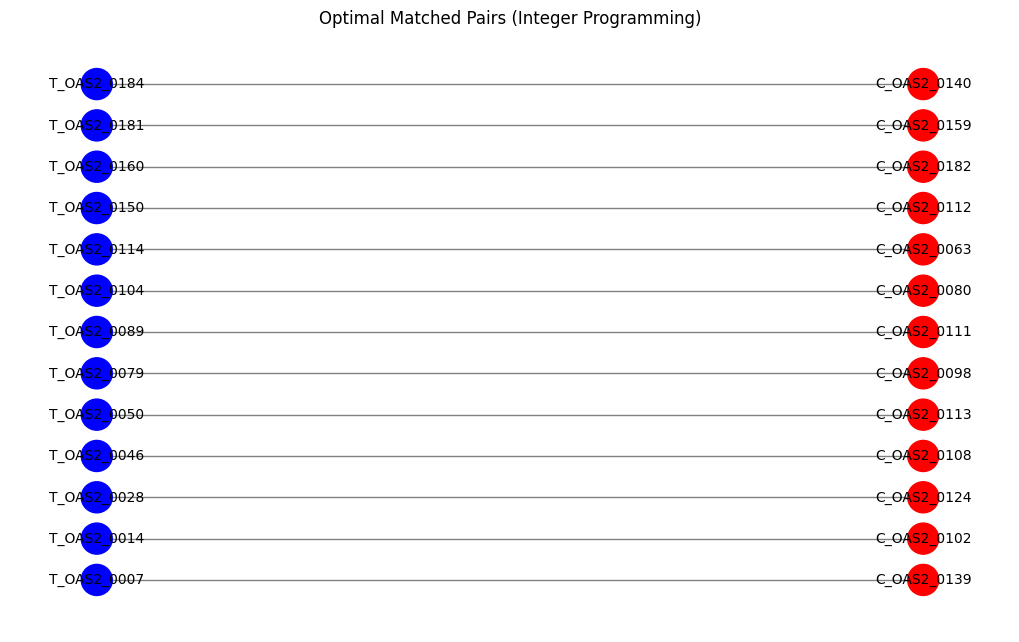

In [19]:
import pandas as pd
from pulp import *
import networkx as nx
import matplotlib.pyplot as plt

def optimal_balanced_matching_ip(df, treated_ids, control_ids, covariates):
    # Create the model
    model = LpProblem("Optimal_Matching", LpMinimize)
    
    # Create binary decision variables for each potential match
    # x[i,j] = 1 if treated subject i is matched to control subject j
    x = LpVariable.dicts("match",
                        ((i, j) for i in treated_ids for j in control_ids),
                        cat='Binary')
    
    # Objective: Minimize total Mahalanobis distance
    objective = []
    for i in treated_ids:
        for j in control_ids:
            try:
                distance = calculate_mahalanobis_distance(df, i, j, covariates)
                objective.append(distance * x[i,j])
            except ValueError as e:
                print(f"Skipping pair ({i}, {j}): {e}")
                objective.append(0 * x[i,j])  # Add dummy term to maintain indexing
    
    model += lpSum(objective)
    
    # Constraint 1: Each treated subject must be matched to exactly one control
    for i in treated_ids:
        model += lpSum(x[i,j] for j in control_ids) == 1
    
    # Constraint 2: Each control subject can be matched to at most one treated subject
    for j in control_ids:
        model += lpSum(x[i,j] for i in treated_ids) <= 1
    
    # Solve the model
    solver = PULP_CBC_CMD(msg=False)
    model.solve(solver)
    
    # Extract matched pairs
    matched_pairs = []
    for i in treated_ids:
        for j in control_ids:
            if value(x[i,j]) > 0.9:  # Using 0.9 instead of 1 to handle floating-point precision
                matched_pairs.append((i, j))
    
    return matched_pairs

def plot_matched_pairs(matched_pairs):
    G = nx.Graph()
    
    # Add nodes for treated and control groups
    treated_nodes = [f"T_{t}" for t, c in matched_pairs]
    control_nodes = [f"C_{c}" for t, c in matched_pairs]
    
    G.add_nodes_from(treated_nodes, bipartite=0)
    G.add_nodes_from(control_nodes, bipartite=1)
    
    # Add edges between matched pairs
    edges = [(f"T_{t}", f"C_{c}") for t, c in matched_pairs]
    G.add_edges_from(edges)
    
    # Draw the graph
    plt.figure(figsize=(10, 6))
    pos = nx.bipartite_layout(G, treated_nodes)
    nx.draw(G, pos, with_labels=True, 
            node_color=["blue" if n in treated_nodes else "red" for n in G.nodes()],
            edge_color="gray", node_size=500, font_size=10)
    plt.title("Optimal Matched Pairs (Integer Programming)")
    plt.show()

# Perform matching
matched_pairs = optimal_balanced_matching_ip(df, treated_ids, control_ids, covariates)

# Plot results
print("Matched Pairs after Integer Programming Matching:")
for matched_pair in matched_pairs:
    print(matched_pair)

plot_matched_pairs(matched_pairs)

## Covariate Distributions Before and After Matching

The following plots show the distributions of covariates before and after matching for the treated and control groups. The goal is to assess the balance of covariates between the groups. 
    Analyze matched pairs by comparing brain volumes and demographics between treated and control groups.
    
    Parameters:
    df: OASIS dataset with variables
    matched_pairs: List of tuples containing (treated_id, control_id)


Statistical Analysis Results:
--------------------------------------------------
Number of matched pairs: 13

Brain Volume Comparison:
Mean Difference: -0.0095
Wilcoxon Test: statistic=23.00, p-value=0.1272

Intracranial Volume Comparison:
Mean Difference: -27.85
Wilcoxon Test: statistic=28.00, p-value=0.2439

Age Comparison:
Mean Difference: 0.31


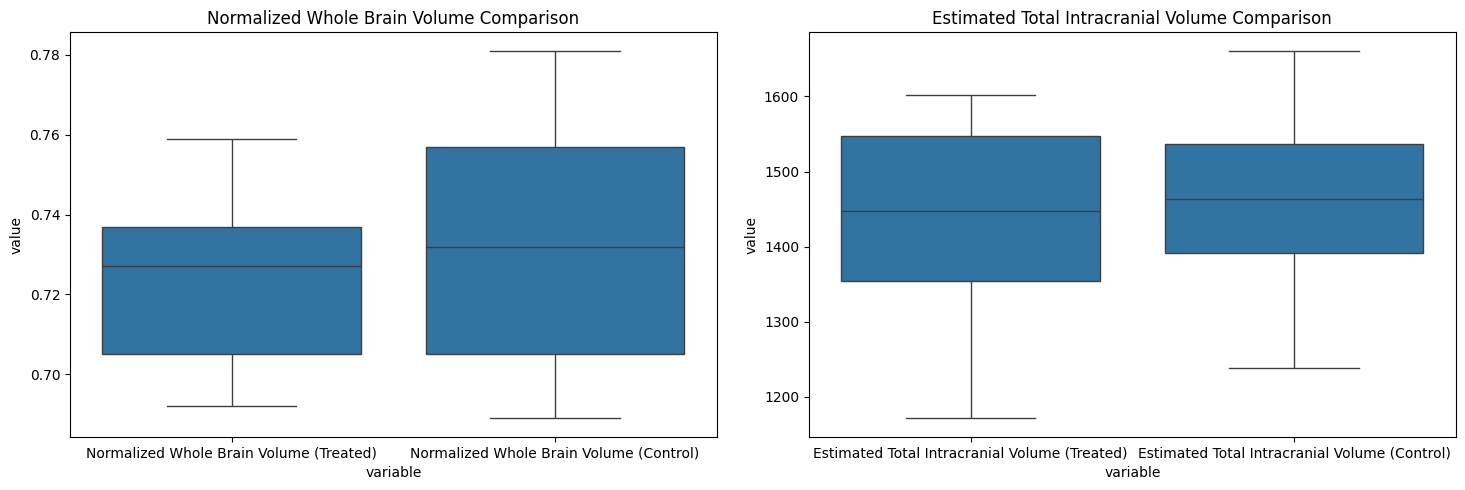

In [35]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_matched_pairs(df, matched_pairs):
    # 1. Create separate dataframes for matched treated and control groups
    treated_ids = [pair[0] for pair in matched_pairs]
    control_ids = [pair[1] for pair in matched_pairs]
    
    # Extract matched subjects from original dataset
    treated_data = df[df['subject_id'].isin(treated_ids)].copy()
    control_data = df[df['subject_id'].isin(control_ids)].copy()
    
    covariate_labels = {
        'n_wbv': 'Normalized Whole Brain Volume',
        'e_tiv': 'Estimated Total Intracranial Volume',
        'age': 'Age (years)',
        'educ': 'Years of Education',
        'time_of_ad': 'Time to Alzheimer Diagnosis'
    }
    
    # 2. Create a merged dataset of matched pairs
    matched_data = pd.DataFrame()
    for t_id, c_id in matched_pairs:
        try:
            treated_row = df[df['subject_id'] == t_id].iloc[0]
            control_row = df[df['subject_id'] == c_id].iloc[0]
            
            pair_data = pd.DataFrame({
                'Treated ID': [t_id],
                'Control ID': [c_id],
                covariate_labels['n_wbv'] + ' (Treated)': [treated_row['n_wbv']],
                covariate_labels['n_wbv'] + ' (Control)': [control_row['n_wbv']],
                covariate_labels['e_tiv'] + ' (Treated)': [treated_row['e_tiv']],
                covariate_labels['e_tiv'] + ' (Control)': [control_row['e_tiv']],
                covariate_labels['age'] + ' (Treated)': [treated_row['age']],
                covariate_labels['age'] + ' (Control)': [control_row['age']],
                covariate_labels['educ'] + ' (Treated)': [treated_row['educ']],
                covariate_labels['educ'] + ' (Control)': [control_row['educ']],
                covariate_labels['time_of_ad']: [treated_row['time_of_ad']]
            })
            matched_data = pd.concat([matched_data, pair_data], ignore_index=True)
        except (KeyError, IndexError) as e:
            print(f"Warning: Could not process pair ({t_id}, {c_id}): {str(e)}")
            continue
    
    if len(matched_data) == 0:
        raise ValueError("No valid matched pairs could be processed")
    
    # 3. Compute differences in measurements
    matched_data['Brain Volume Difference'] = matched_data[covariate_labels['n_wbv'] + ' (Treated)'] - matched_data[covariate_labels['n_wbv'] + ' (Control)']
    matched_data['Intracranial Volume Difference'] = matched_data[covariate_labels['e_tiv'] + ' (Treated)'] - matched_data[covariate_labels['e_tiv'] + ' (Control)']
    matched_data['Age Difference'] = matched_data[covariate_labels['age'] + ' (Treated)'] - matched_data[covariate_labels['age'] + ' (Control)']
    
    # Perform Wilcoxon tests
    wbv_stat, wbv_pval = stats.wilcoxon(
        matched_data[covariate_labels['n_wbv'] + ' (Treated)'],
        matched_data[covariate_labels['n_wbv'] + ' (Control)']
    )
    
    tiv_stat, tiv_pval = stats.wilcoxon(
        matched_data[covariate_labels['e_tiv'] + ' (Treated)'],
        matched_data[covariate_labels['e_tiv'] + ' (Control)']
    )
    
    # Print results
    print("\nStatistical Analysis Results:")
    print("-" * 50)
    print(f"Number of matched pairs: {len(matched_data)}")
    
    print("\nBrain Volume Comparison:")
    print(f"Mean Difference: {matched_data['Brain Volume Difference'].mean():.4f}")
    print(f"Wilcoxon Test: statistic={wbv_stat:.2f}, p-value={wbv_pval:.4f}")
    
    print("\nIntracranial Volume Comparison:")
    print(f"Mean Difference: {matched_data['Intracranial Volume Difference'].mean():.2f}")
    print(f"Wilcoxon Test: statistic={tiv_stat:.2f}, p-value={tiv_pval:.4f}")
    
    print("\nAge Comparison:")
    print(f"Mean Difference: {matched_data['Age Difference'].mean():.2f}")
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(data=pd.melt(matched_data[[covariate_labels['n_wbv'] + ' (Treated)', covariate_labels['n_wbv'] + ' (Control)']]), 
                x='variable', y='value', ax=ax1)
    ax1.set_title(covariate_labels['n_wbv'] + ' Comparison')
    
    sns.boxplot(data=pd.melt(matched_data[[covariate_labels['e_tiv'] + ' (Treated)', covariate_labels['e_tiv'] + ' (Control)']]), 
                x='variable', y='value', ax=ax2)
    ax2.set_title(covariate_labels['e_tiv'] + ' Comparison')
    
    plt.tight_layout()
    plt.show()
    
    return matched_data

# Example usage:
matched_data = analyze_matched_pairs(df, matched_pairs)

## Covariate Distributions Before and After Matching

In this section, we visualize the distributions of covariates before and after matching for the treated and control groups. The goal is to assess the balance of covariates between the groups and determine the effectiveness of the matching process.

### Code Explanation

The provided code defines a function `plot_covariate_distributions` that takes the following parameters:
- `df`: The original dataframe containing the dataset.
- `matched_pairs`: A list of tuples representing matched pairs of treated and control subjects.
- `covariates`: A list of covariate names used for matching.
- `covariate_labels`: A dictionary mapping covariate names to more readable labels.

The function performs the following steps:
1. Extracts the matched treated and control subjects from the original dataframe.
2. Creates a subplot grid with two columns for each covariate, where the left column shows the distribution before matching and the right column shows the distribution after matching.
3. For each covariate, plots the distribution of the treated and control groups before and after matching using seaborn's `histplot` function.
4. Adds titles, labels, and legends to the plots for better readability.
5. Displays the plots using `plt.show()`.

### Results

The resulting plots show the distributions of each covariate for the treated and control groups before and after matching. By comparing the distributions, we can assess how well the matching process has balanced the covariates between the treated and control groups. Ideally, the distributions should be similar after matching, indicating that the groups are comparable and potential biases have been reduced.

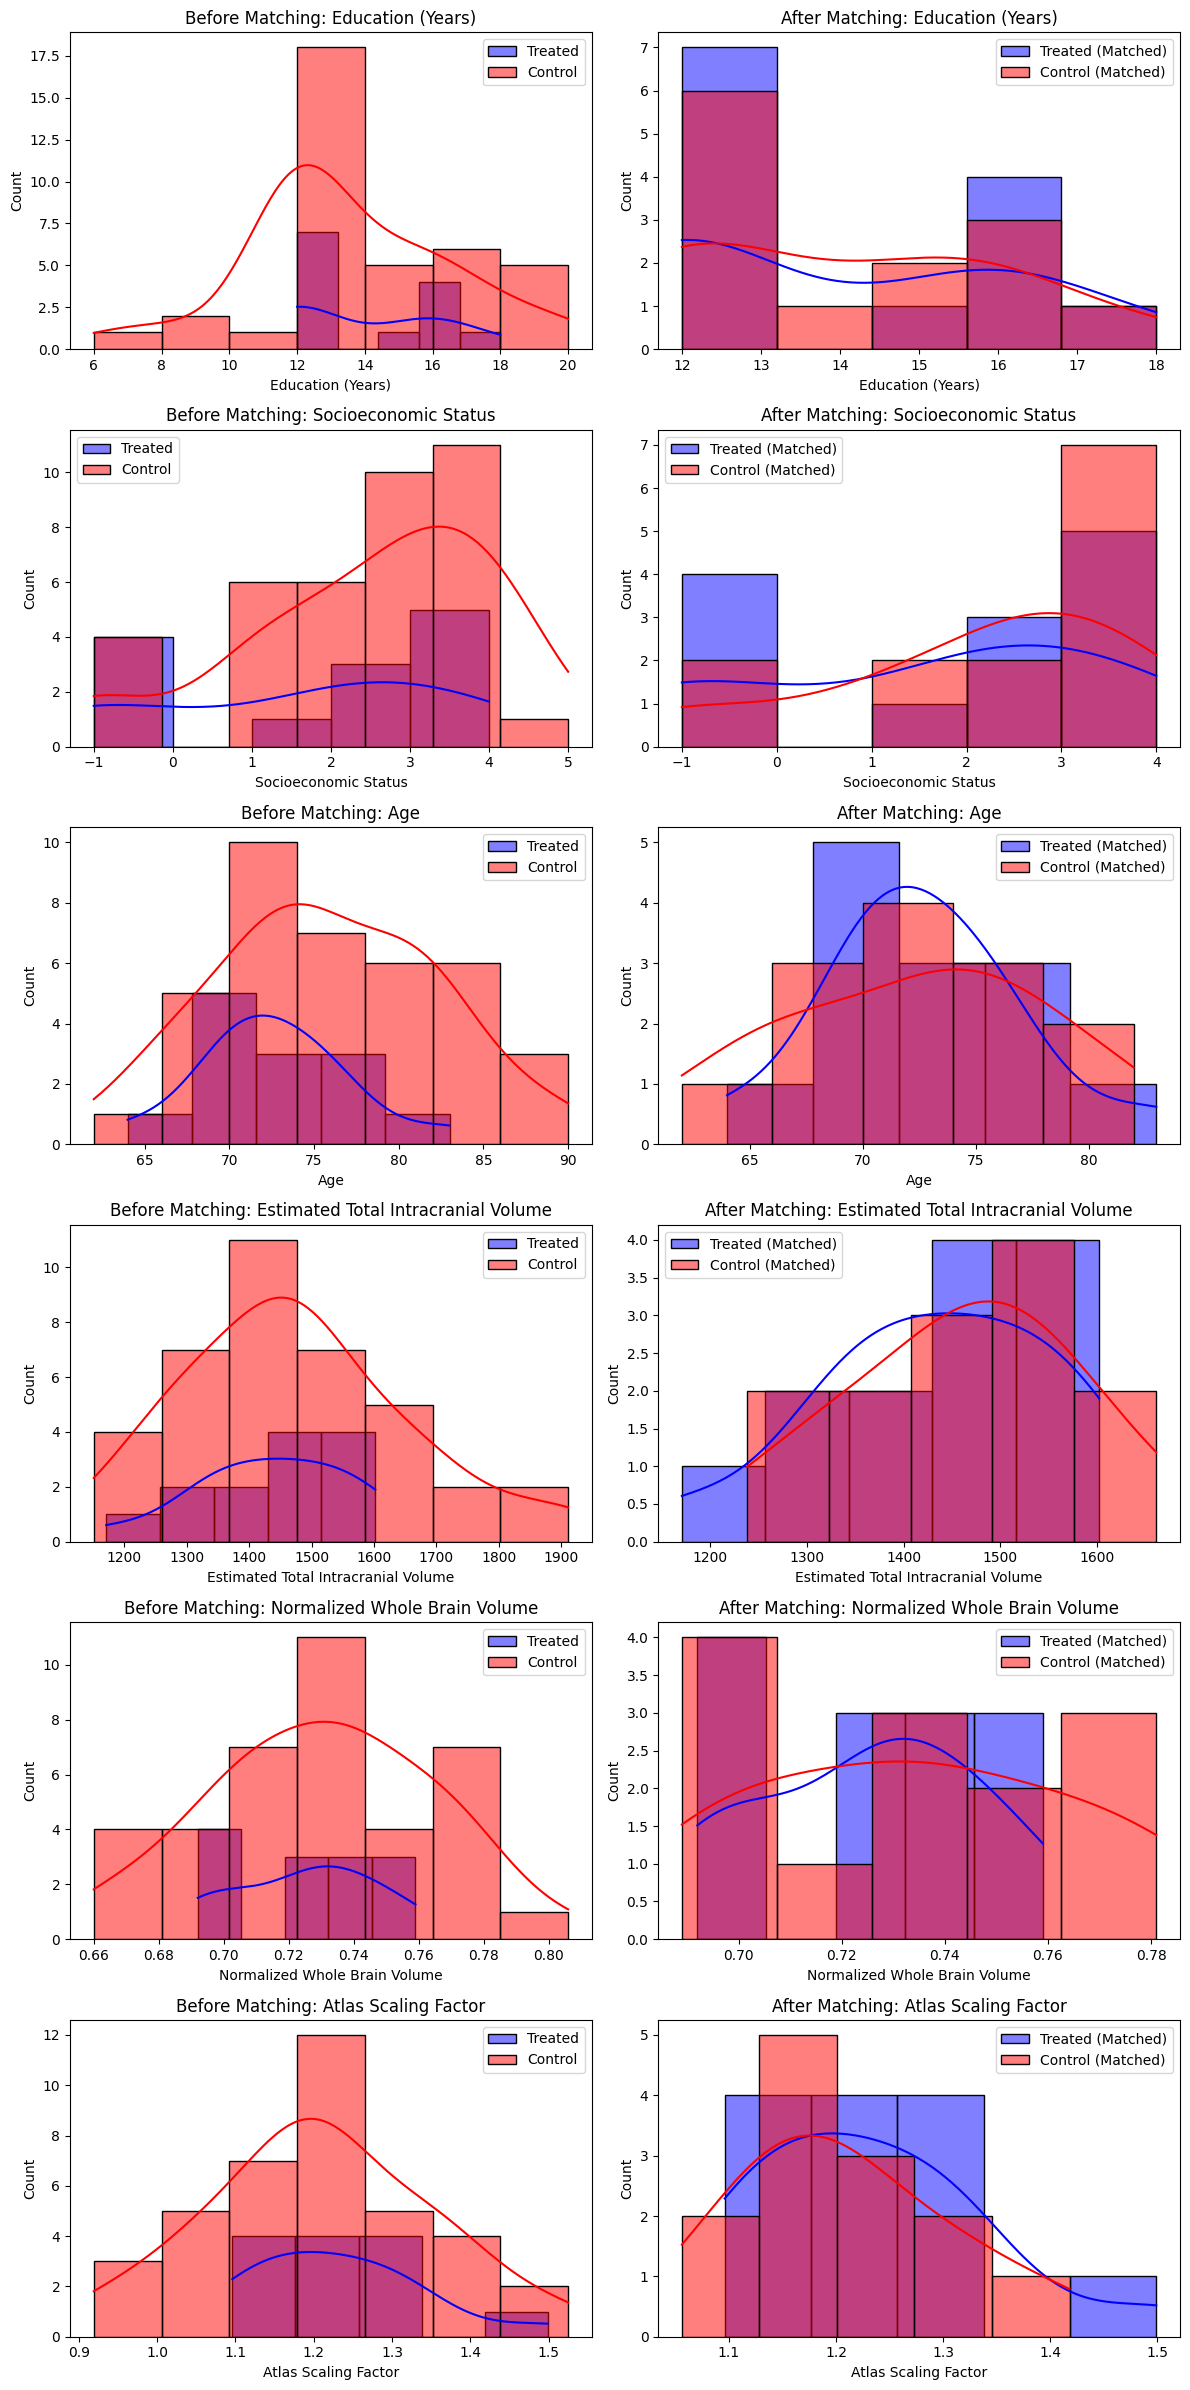

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_covariate_distributions(df, matched_pairs, covariates, covariate_labels):
    treated_matched = df[df["subject_id"].isin([pair[0] for pair in matched_pairs])]
    control_matched = df[df["subject_id"].isin([pair[1] for pair in matched_pairs])]

    fig, axes = plt.subplots(len(covariates), 2, figsize=(12, len(covariates) * 4))

    for i, cov in enumerate(covariates):
        # Before Matching
        sns.histplot(df[df["subject_id"].isin(treated_ids)][cov], kde=True, color="blue", label="Treated", ax=axes[i, 0])
        sns.histplot(df[df["subject_id"].isin(control_ids)][cov], kde=True, color="red", label="Control", ax=axes[i, 0])
        axes[i, 0].set_title(f"Before Matching: {covariate_labels[cov]}")
        axes[i, 0].set_xlabel(covariate_labels[cov])
        axes[i, 0].legend()

        # After Matching
        sns.histplot(treated_matched[cov], kde=True, color="blue", label="Treated (Matched)", ax=axes[i, 1])
        sns.histplot(control_matched[cov], kde=True, color="red", label="Control (Matched)", ax=axes[i, 1])
        axes[i, 1].set_title(f"After Matching: {covariate_labels[cov]}")
        axes[i, 1].set_xlabel(covariate_labels[cov])
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()

plot_covariate_distributions(df, matched_pairs, covariates, covariate_labels)


## Sensitivity Analysis for Hidden Bias


Extracting values for covariate: age

Mean difference: 0.31
Standard deviation of differences: 5.47

Calculating sensitivity analysis for different gamma values:
Gamma=1.0: Sensitivity Analysis p-value = 0.455
Gamma=1.5: Sensitivity Analysis p-value = 0.463
Gamma=2.0: Sensitivity Analysis p-value = 0.466
Gamma=2.5: Sensitivity Analysis p-value = 0.469
Gamma=3.0: Sensitivity Analysis p-value = 0.470

Creating sensitivity analysis plot...


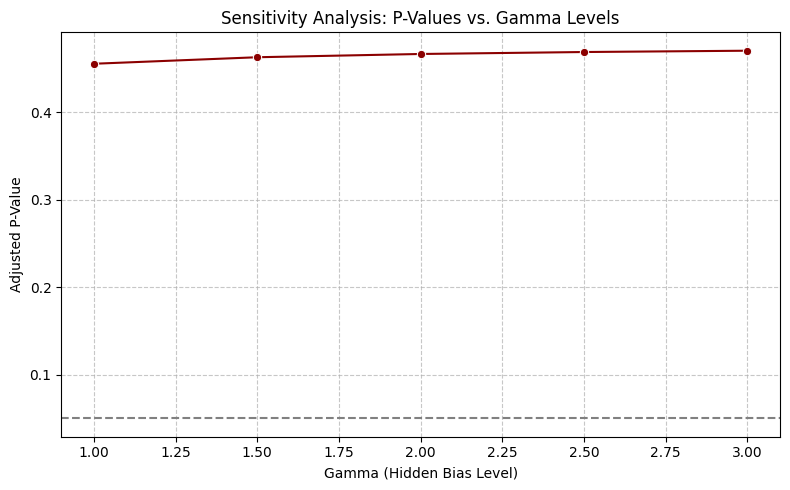

{1.0: np.float64(0.4552011761821414),
 1.5: np.float64(0.4626435983453271),
 2.0: np.float64(0.46636988463422824),
 2.5: np.float64(0.4686070934011003),
 3.0: np.float64(0.47009912124678443)}

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

def sensitivity_analysis(treated, control, covariate):
    # Validate inputs
    if covariate not in treated.columns:
        raise ValueError(f"Covariate '{covariate}' not found in treated group columns: {treated.columns.tolist()}")
    if covariate not in control.columns:
        raise ValueError(f"Covariate '{covariate}' not found in control group columns: {control.columns.tolist()}")

    if len(treated) != len(control):
        min_size = min(len(treated), len(control))
        treated = treated[:min_size]  # Trim to match sizes
        control = control[:min_size]
        print(f"Groups trimmed to size: {min_size}")

    gamma_values = [1.0, 1.5, 2.0, 2.50, 3.0]  # Levels of hidden bias
    p_values = []  # Store just p-values in a separate list
    
    print(f"\nExtracting values for covariate: {covariate}")
    treated_vals = treated[covariate].values
    control_vals = control[covariate].values
    
    print(f"Treated values summary: mean={np.mean(treated_vals):.2f}, std={np.std(treated_vals):.2f}")
    print(f"Control values summary: mean={np.mean(control_vals):.2f}, std={np.std(control_vals):.2f}")

    mean_diff = np.mean(treated_vals) - np.mean(control_vals)
    std_diff = np.std(treated_vals - control_vals)
    
    print(f"\nMean difference: {mean_diff:.2f}")
    print(f"Standard deviation of differences: {std_diff:.2f}\n")

    print("Calculating sensitivity analysis for different gamma values:")
    for gamma in gamma_values:
        # Adjust the odds ratio for hidden bias
        sensitivity_factor = gamma / (1 + gamma)
        adjusted_stat = mean_diff / (std_diff * sensitivity_factor)
        
        # Calculate p-value
        p_value = 1 - norm.cdf(abs(adjusted_stat))
        p_values.append(p_value)
        print(f"Gamma={gamma}: Sensitivity Analysis p-value = {p_value:.3f}")
    
    print("\nCreating sensitivity analysis plot...")
    # Create the plot
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=gamma_values, y=p_values, marker="o", color="darkred")
    
    plt.axhline(y=0.05, color='gray', linestyle='dashed')  # Significance threshold
    plt.title("Sensitivity Analysis: P-Values vs. Gamma Levels")
    plt.xlabel("Gamma (Hidden Bias Level)")
    plt.ylabel("Adjusted P-Value")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    return dict(zip(gamma_values, p_values))  # Return results as a dictionary

matched_treated_ids  = [pair[0] for pair in matched_pairs]
matched_control_ids  = [pair[1] for pair in matched_pairs]

treated_matched = df[df["subject_id"].isin(matched_treated_ids)]
control_matched = df[df["subject_id"].isin(matched_control_ids)]

sensitivity_analysis(treated_matched, control_matched, "age")

## 📌 Conclusion

    In this notebook, we performed a comprehensive analysis of the OASIS dataset, focusing on mitigating biases through Balanced Risk Set Matching (BRSM). Here is a summary of the key steps and findings:

1. **Data Loading and Preprocessing**:
    - The OASIS dataset was loaded and preprocessed by renaming columns for better readability.
    - Missing values were handled, and the dataset was sorted and grouped by subject ID to avoid duplicates.

2. **Covariate Selection**:
    - Several covariates were selected for matching, including Education (Years), Socioeconomic Status, Age, Estimated Total Intracranial
    Volume, Normalized Whole Brain Volume, and Atlas Scaling Factor.

3. **Mahalanobis Distance Calculation**:
    - The Mahalanobis distance was used to quantify the similarity between treated and control subjects based on the selected covariates.
    - A histogram of the Mahalanobis distances was plotted to visualize the distribution.

4. **Optimal Balanced Matching**:
    - An integer programming approach was used to perform optimal balanced matching between treated and control subjects.
    - The matched pairs were extracted and visualized using a bipartite graph.

5. **Covariate Distributions Before and After Matching**:
    - The distributions of covariates before and after matching were plotted to assess the balance between treated and control groups.
    - The effectiveness of the matching process was evaluated by comparing the distributions.

6. **Statistical Analysis of Matched Pairs**:
    - The matched pairs were analyzed by comparing brain volumes and demographics between treated and control groups.
    - Wilcoxon tests were performed to assess the statistical significance of the differences.

7. **Sensitivity Analysis for Hidden Bias**:
    - A sensitivity analysis was conducted to evaluate the robustness of the matching results to potential hidden biases.
    - The analysis involved adjusting the odds ratio for hidden bias and calculating the corresponding p-values.


    Overall, the analysis demonstrated the effectiveness of Balanced Risk Set Matching in reducing biases and ensuring comparability between treated and control groups in the OASIS dataset. The results provide valuable insights into the impact of Alzheimer's disease on brain volumes and demographics.